In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re
from collections import Counter

In [2]:
df = pd.read_csv("df.csv")

In [3]:
stopwords = pd.read_csv("stopwords_pl.txt")
stopwords = list(stopwords.a)

In [4]:
new_words = ["nie", "w", "się", "a", "ref", "x2", "x6"]

In [5]:
stopwords

['aby',
 'ach',
 'acz',
 'aczkolwiek',
 'aj',
 'albo',
 'ale',
 'ależ',
 'ani',
 'aż',
 'bardziej',
 'bardzo',
 'bez',
 'bo',
 'bowiem',
 'by',
 'byli',
 'bym',
 'bynajmniej',
 'być',
 'był',
 'była',
 'było',
 'były',
 'będzie',
 'będą',
 'cali',
 'cała',
 'cały',
 'chce',
 'choć',
 'ci',
 'ciebie',
 'cię',
 'co',
 'cokolwiek',
 'coraz',
 'coś',
 'czasami',
 'czasem',
 'czemu',
 'czy',
 'czyli',
 'często',
 'daleko',
 'dla',
 'dlaczego',
 'dlatego',
 'do',
 'dobrze',
 'dokąd',
 'dość',
 'dr',
 'dużo',
 'dwa',
 'dwaj',
 'dwie',
 'dwoje',
 'dzisiaj',
 'dziś',
 'gdy',
 'gdyby',
 'gdyż',
 'gdzie',
 'gdziekolwiek',
 'gdzieś',
 'go',
 'godz',
 'hab',
 'i',
 'ich',
 'ii',
 'iii',
 'ile',
 'im',
 'inna',
 'inne',
 'inny',
 'innych',
 'inż',
 'iv',
 'ix',
 'iż',
 'ja',
 'jak',
 'jakaś',
 'jakby',
 'jaki',
 'jakichś',
 'jakie',
 'jakiś',
 'jakiż',
 'jakkolwiek',
 'jako',
 'jakoś',
 'je',
 'jeden',
 'jedna',
 'jednak',
 'jednakże',
 'jedno',
 'jednym',
 'jedynie',
 'jego',
 'jej',
 'jemu',
 'jes

In [6]:
stopwords = stopwords+new_words

In [7]:
df = df[df.columns[1:]]

In [8]:
df.text = df.text.apply(lambda x: x[1:-1])

In [9]:
df.text.iloc[0]

'Figo Fagot:, , Raz, dwa, dwa czterdzieści,, cztery puszki torba zmieści., Czterech króli nie doniosę,, jedno jebnę już po drodze., *gul gul gul* ahhh..., Jak w stajence w siatce mam., Kacpi, Melchior i Baltazar,, na mieszkanku dzisiaj faza., (Dzwonek do drzwi!), Tyle człowieku stój., (Czy to są psy?), Zaraz strzeli mnie chuj., (Zagaście szlugi!), Kacpiego piję., (Ściszcie rapsy!), Pierdolę, dzwonię!, , Popek:, Bracia Figo Fagot plus Popek, zryty czosnek, królu Albanii., Dzisiaj razem na kwadracie!, Ram pam pam pam!, , Dzisiaj się najebie razem z braćmi król,, rozjebiemy całe siano, idź pan w chuj!, Nic nie pamiętam, co się działo na kwadracie!, Nic nie pamiętam, polej wódki bracie!, , Najebany nie pamiętam, co robiłem wczoraj,, czterech króli plus pół litra plus wyjebka na mych schodach., Nic nie pamiętam, Jezu jak nakurwia mnie wątroba!, Jakiego mam kaca!, I gdzie jest moja głowa?!, To jest król z Albanii i bracia Figo Fagot!, Dawaj ten towar, usmażę se mózg!, Zaraz się dojebię i pol

In [10]:
df.text = df.text.apply(lambda x: x.replace("Tekst piosenki:",""))
df.text = df.text.apply(lambda x: x.replace("Ref.",""))
df.text = df.text.apply(lambda x: x.replace("ref",""))
df.text = df.text.apply(lambda x: x.replace("ref.",""))
df.text = df.text.apply(lambda x: x.replace("(Fagot)",""))
df.text = df.text.apply(lambda x: x.replace("(Figo):",""))
df.text = df.text.apply(lambda x: x.replace("(Figo)",""))
df.text = df.text.apply(lambda x: x.replace("1.",""))
df.text = df.text.apply(lambda x: x.replace("I.",""))
df.text = df.text.apply(lambda x: x.replace("Figo Fagot:",""))
df.text = df.text.apply(lambda x: x.replace("Intro:",""))
df.text = df.text.apply(lambda x: x.replace("&nbsp",""))
df.text = df.text.apply(lambda x: x.replace("x2",""))
df.text = df.text.apply(lambda x: x.replace("x4",""))
df.text = df.text.apply(lambda x: x.replace("Poznaj historię zmian tego tekstu",""))

#punctuation
df.text = df.text.apply(lambda x: re.sub(r'[^\w\s]', '', x))
df.text = df.text.apply(lambda x: x.lower())
#stopwords
df.text = df.text.apply(lambda x: x if x not in stopwords else "")





In [11]:
df.text

0       raz dwa dwa czterdzieści cztery puszki torba...
1       posłuchaj mnie teraz seba odstaw na chwilę p...
2     spotkałem ją na lquano disco w dawidach chwilę...
3     metal długie włosy ma a kiedy disco gra hiphop...
4      bal jak bal disco rżnie na full bal jak bal d...
                            ...                        
64    piątkowa noc to wódy czas to jest wódy czas 10...
65    klub noc nocny czar pod pachami adidas podchod...
66    wędkować pozwól wędkować daj no nie bądź taka ...
67    dzieńdobry tu bracia figo fagot zapraszamy do ...
68    wzrokiem szukam cię  nie widzę ryj maciory prz...
Name: text, Length: 69, dtype: object

In [12]:
def remove_empty(lst):
    return [x for x in lst if len(x)>0]

In [13]:
def remove_stopwords(lst):
    return [x for x in lst if x not in stopwords]

In [14]:
df['words']= df.text.apply(lambda x: x.split(" "))



In [15]:
df['words'] = df['words'].apply(lambda x: remove_stopwords(x))

In [16]:
df['words']

0     [, , czterdzieści, cztery, puszki, torba, zmie...
1     [, , posłuchaj, seba, odstaw, chwilę, piwo, po...
2     [spotkałem, lquano, disco, dawidach, chwilę, s...
3     [metal, długie, włosy, disco, gra, hiphop, kro...
4     [, bal, bal, disco, rżnie, full, bal, bal, dis...
                            ...                        
64    [piątkowa, noc, wódy, czas, wódy, czas, 100, z...
65    [klub, noc, nocny, czar, pachami, adidas, podc...
66    [wędkować, pozwól, wędkować, daj, bądź, laj, l...
67    [dzieńdobry, bracia, figo, fagot, zapraszamy, ...
68    [wzrokiem, szukam, , widzę, ryj, maciory, prze...
Name: words, Length: 69, dtype: object

In [17]:
df['words'] = df['words'].apply(lambda x: remove_empty(x))

In [18]:
df['counter'] = df['words'].apply(lambda x: Counter(x))

In [19]:
df['top_10']=df['counter'].apply(lambda x: sorted(x.items(), key=lambda kv: kv[1], reverse=True)[:10] )

In [20]:
lab= [x[0] for x in df['top_10'].iloc[0]]
val = [x[1] for x in df['top_10'].iloc[0]]

<BarContainer object of 10 artists>

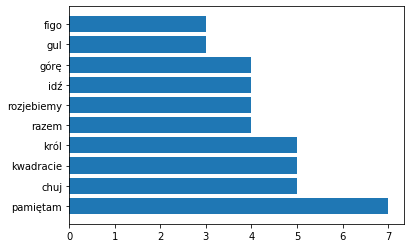

In [21]:
plt.barh(lab, val)


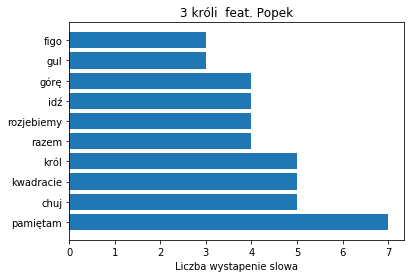

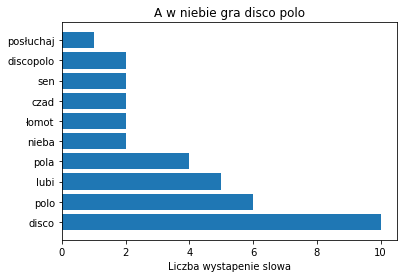

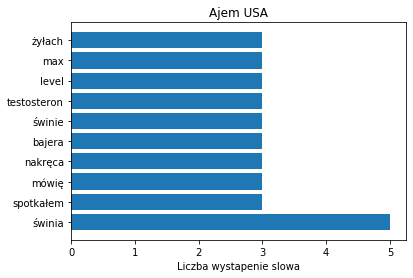

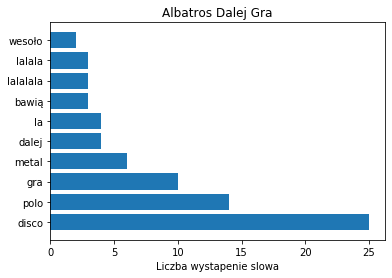

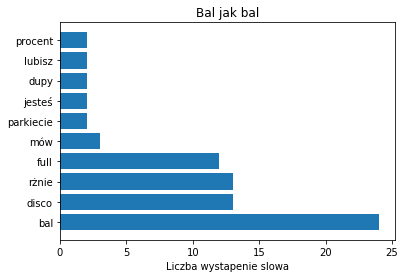

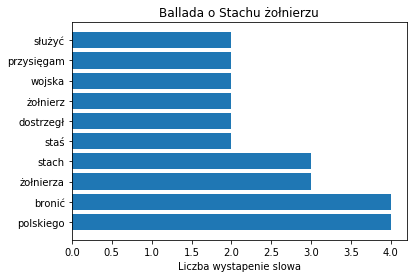

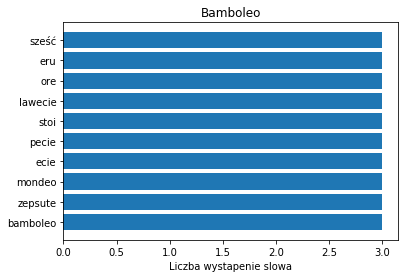

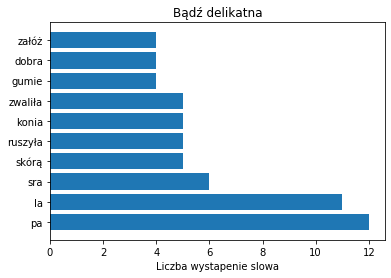

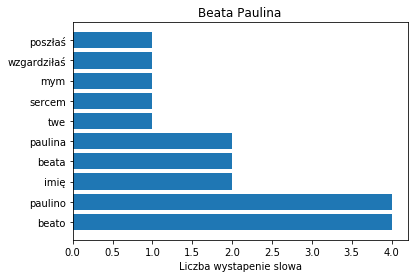

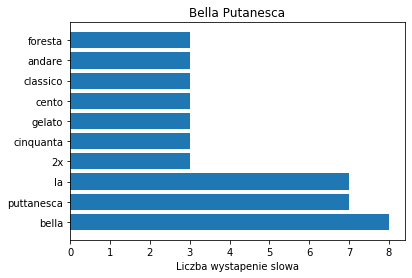

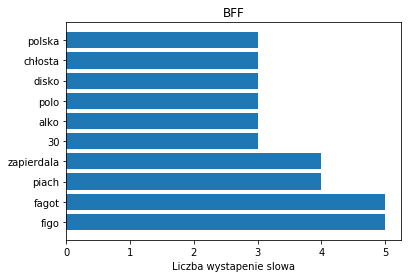

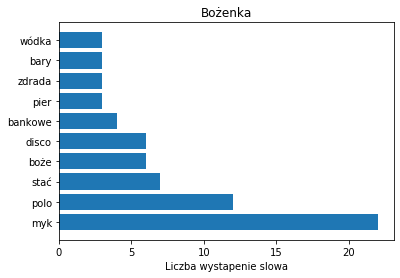

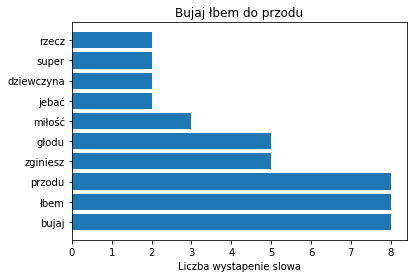

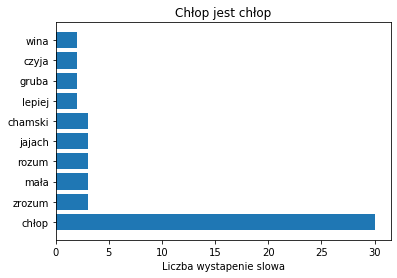

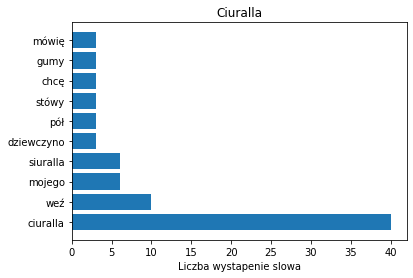

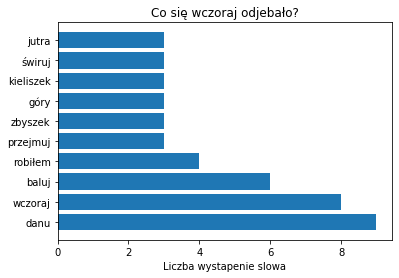

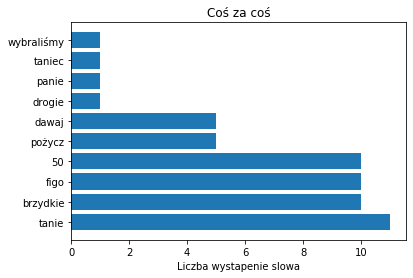

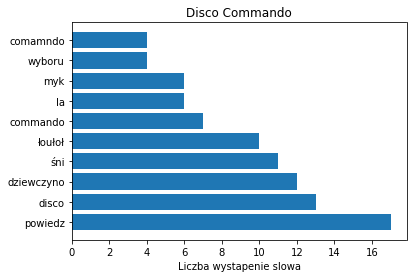

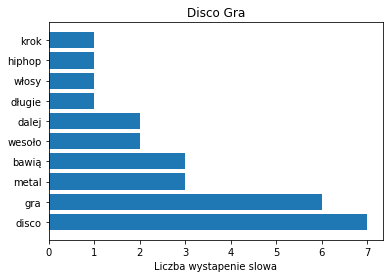

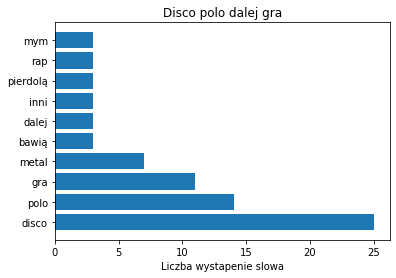

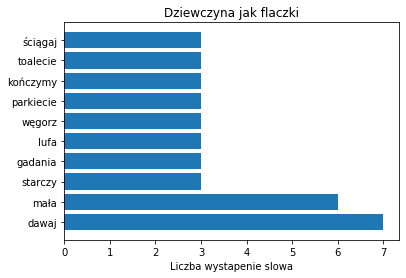

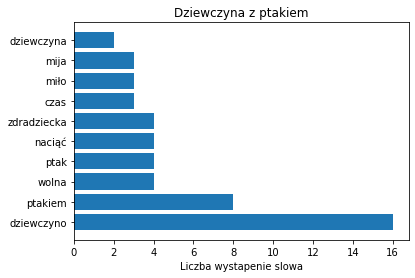

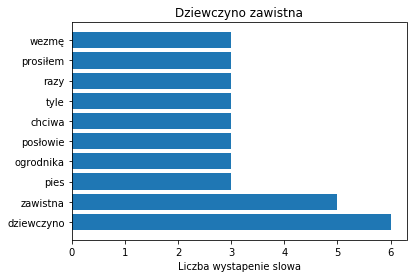

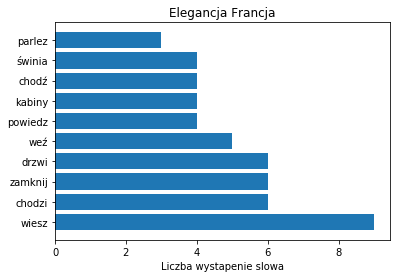

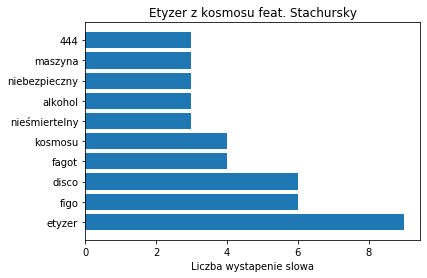

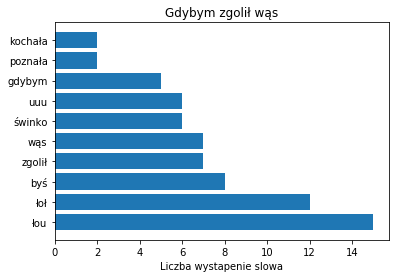

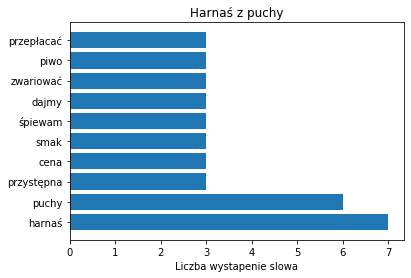

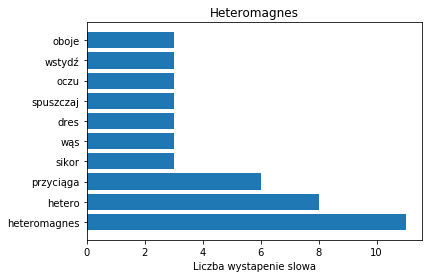

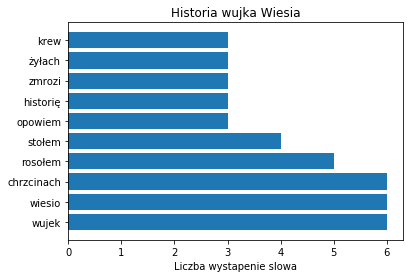

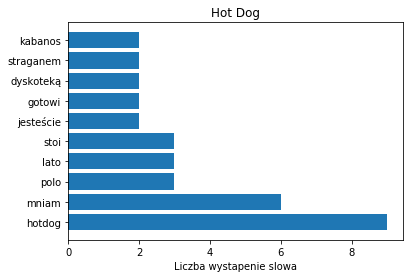

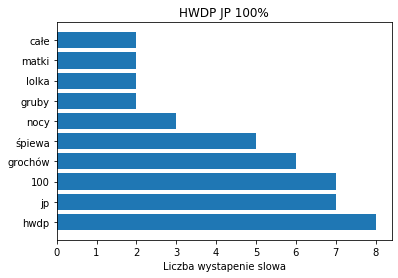

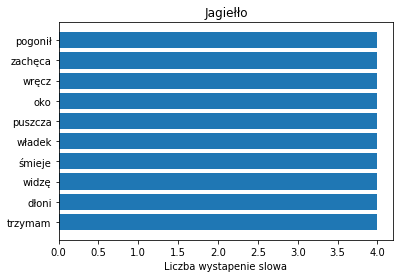

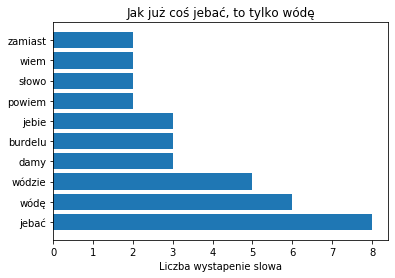

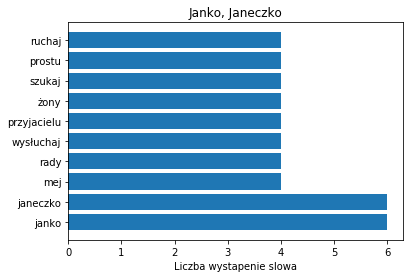

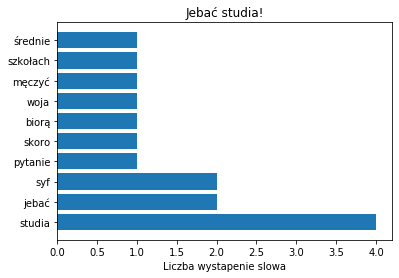

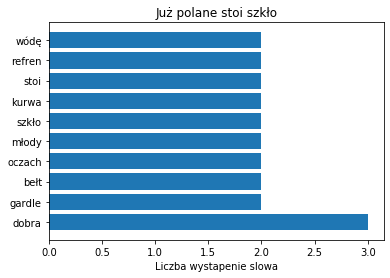

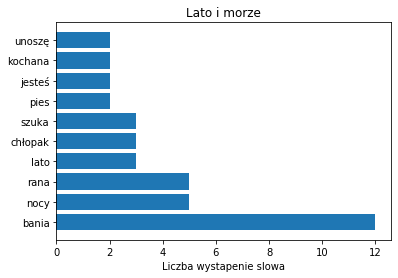

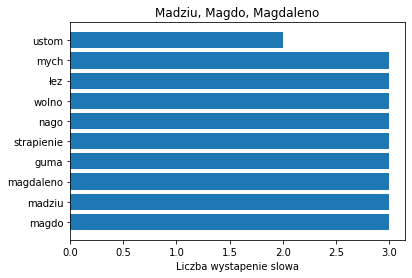

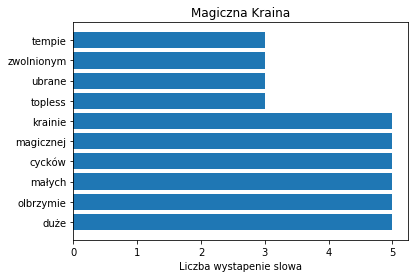

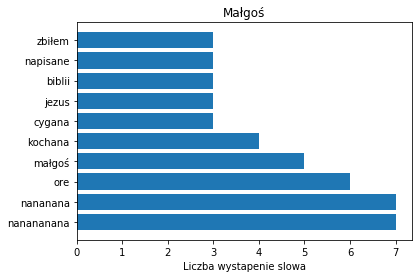

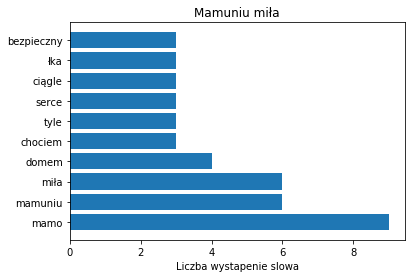

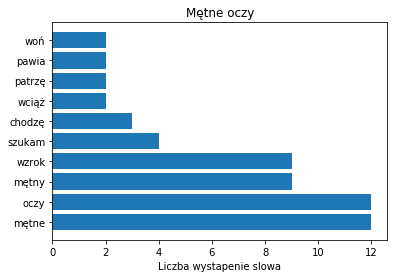

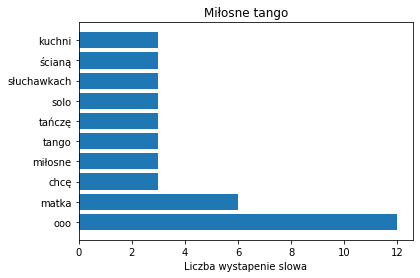

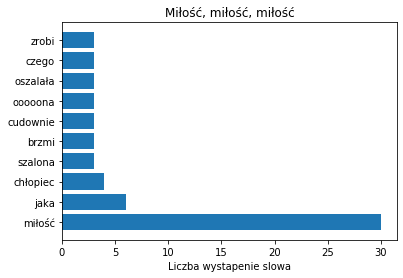

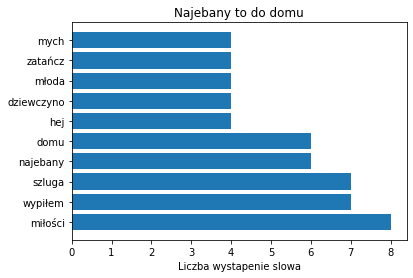

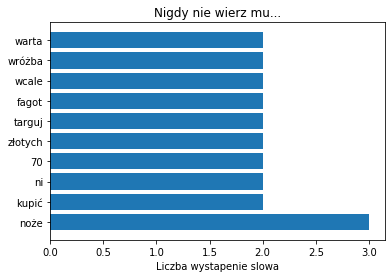

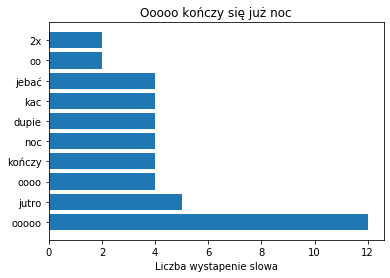

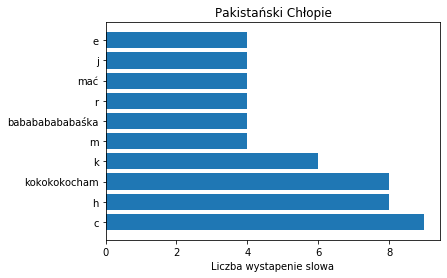

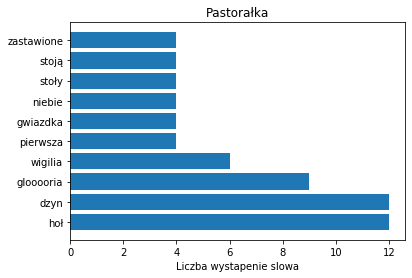

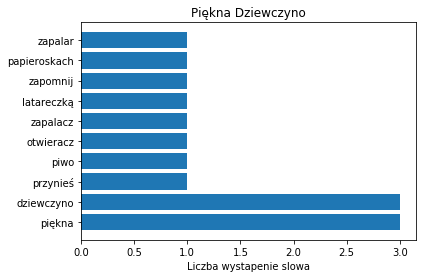

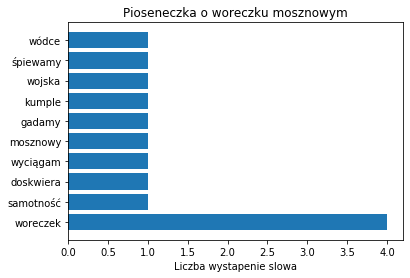

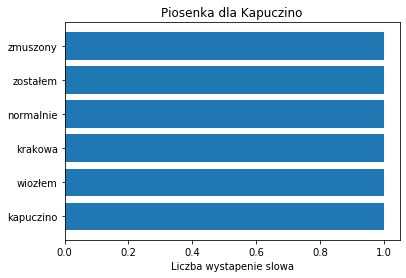

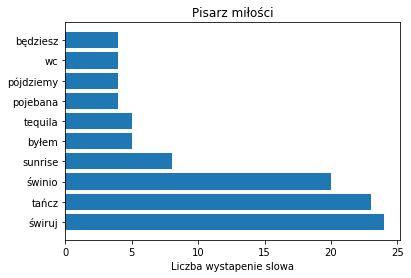

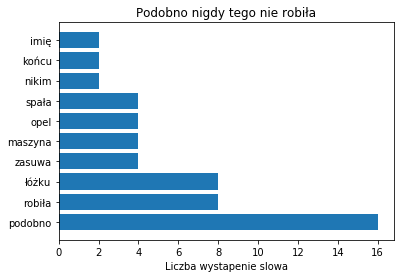

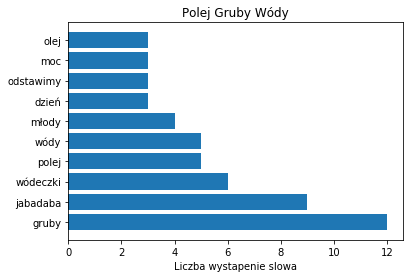

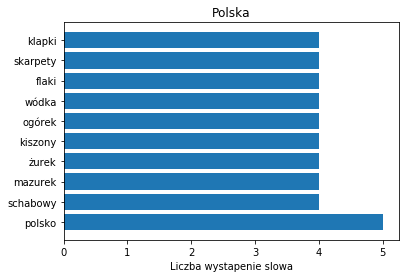

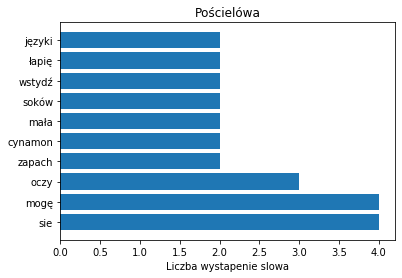

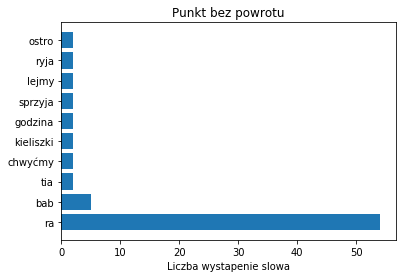

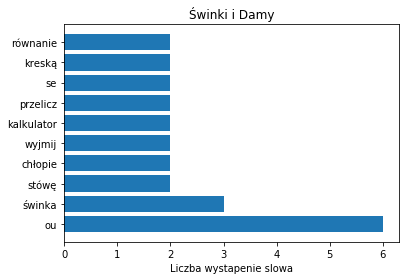

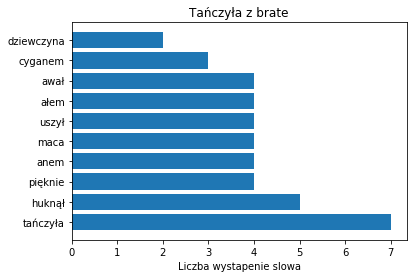

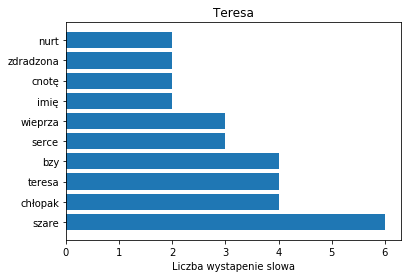

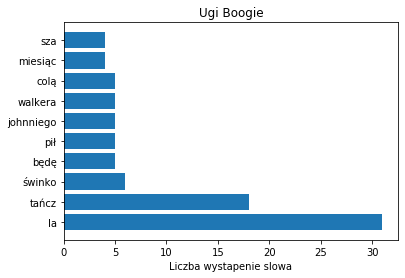

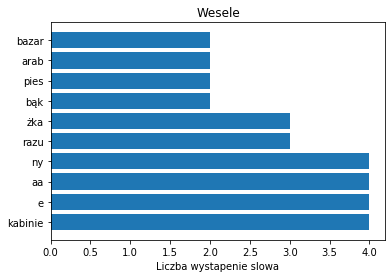

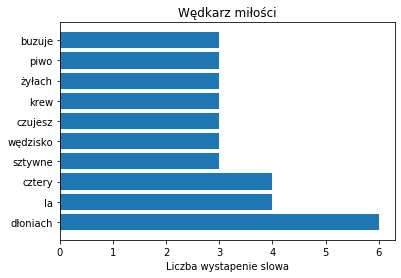

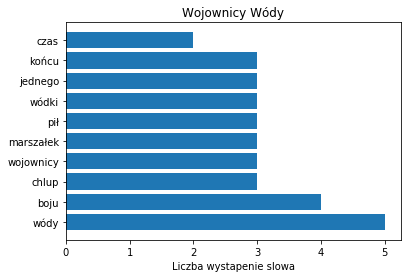

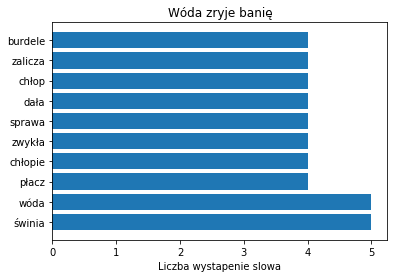

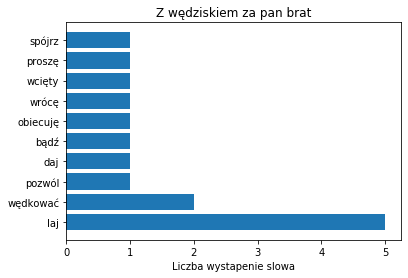

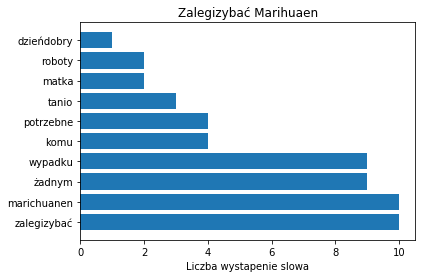

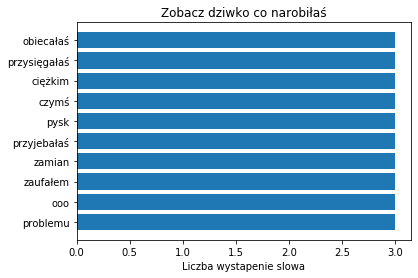

In [22]:
for i in range(69):


    lab= [x[0] for x in df['top_10'].iloc[i]]
    val = [x[1] for x in df['top_10'].iloc[i]]
    plt.barh(lab, val)
    plt.title(df.names.iloc[i])
    plt.xlabel("Liczba wystapenie slowa")
#     plt.savefig("Top10wordsBySongBFF")
    plt.show()
    

In [23]:
from nltk import word_tokenize
import nltk


In [24]:
token = word_tokenize(df.text.iloc[0])

bigrm = nltk.bigrams(token)
list(bigrm)

[('raz', 'dwa'),
 ('dwa', 'dwa'),
 ('dwa', 'czterdzieści'),
 ('czterdzieści', 'cztery'),
 ('cztery', 'puszki'),
 ('puszki', 'torba'),
 ('torba', 'zmieści'),
 ('zmieści', 'czterech'),
 ('czterech', 'króli'),
 ('króli', 'nie'),
 ('nie', 'doniosę'),
 ('doniosę', 'jedno'),
 ('jedno', 'jebnę'),
 ('jebnę', 'już'),
 ('już', 'po'),
 ('po', 'drodze'),
 ('drodze', 'gul'),
 ('gul', 'gul'),
 ('gul', 'gul'),
 ('gul', 'ahhh'),
 ('ahhh', 'jak'),
 ('jak', 'w'),
 ('w', 'stajence'),
 ('stajence', 'w'),
 ('w', 'siatce'),
 ('siatce', 'mam'),
 ('mam', 'kacpi'),
 ('kacpi', 'melchior'),
 ('melchior', 'i'),
 ('i', 'baltazar'),
 ('baltazar', 'na'),
 ('na', 'mieszkanku'),
 ('mieszkanku', 'dzisiaj'),
 ('dzisiaj', 'faza'),
 ('faza', 'dzwonek'),
 ('dzwonek', 'do'),
 ('do', 'drzwi'),
 ('drzwi', 'tyle'),
 ('tyle', 'człowieku'),
 ('człowieku', 'stój'),
 ('stój', 'czy'),
 ('czy', 'to'),
 ('to', 'są'),
 ('są', 'psy'),
 ('psy', 'zaraz'),
 ('zaraz', 'strzeli'),
 ('strzeli', 'mnie'),
 ('mnie', 'chuj'),
 ('chuj', 'zagaście

In [25]:
df['bigram']= df.text.apply(lambda x : list(nltk.bigrams(word_tokenize(x))))

In [26]:
# for x in df['bigram']:
#     print(x)
#     print("********")
#     print("\n")

In [27]:
from nltk.util import ngrams

In [28]:
trigrams=ngrams(token,3)
list(trigrams)

[('raz', 'dwa', 'dwa'),
 ('dwa', 'dwa', 'czterdzieści'),
 ('dwa', 'czterdzieści', 'cztery'),
 ('czterdzieści', 'cztery', 'puszki'),
 ('cztery', 'puszki', 'torba'),
 ('puszki', 'torba', 'zmieści'),
 ('torba', 'zmieści', 'czterech'),
 ('zmieści', 'czterech', 'króli'),
 ('czterech', 'króli', 'nie'),
 ('króli', 'nie', 'doniosę'),
 ('nie', 'doniosę', 'jedno'),
 ('doniosę', 'jedno', 'jebnę'),
 ('jedno', 'jebnę', 'już'),
 ('jebnę', 'już', 'po'),
 ('już', 'po', 'drodze'),
 ('po', 'drodze', 'gul'),
 ('drodze', 'gul', 'gul'),
 ('gul', 'gul', 'gul'),
 ('gul', 'gul', 'ahhh'),
 ('gul', 'ahhh', 'jak'),
 ('ahhh', 'jak', 'w'),
 ('jak', 'w', 'stajence'),
 ('w', 'stajence', 'w'),
 ('stajence', 'w', 'siatce'),
 ('w', 'siatce', 'mam'),
 ('siatce', 'mam', 'kacpi'),
 ('mam', 'kacpi', 'melchior'),
 ('kacpi', 'melchior', 'i'),
 ('melchior', 'i', 'baltazar'),
 ('i', 'baltazar', 'na'),
 ('baltazar', 'na', 'mieszkanku'),
 ('na', 'mieszkanku', 'dzisiaj'),
 ('mieszkanku', 'dzisiaj', 'faza'),
 ('dzisiaj', 'faza', '

In [29]:
fourgrams=ngrams(token,4)
list(fourgrams)

[('raz', 'dwa', 'dwa', 'czterdzieści'),
 ('dwa', 'dwa', 'czterdzieści', 'cztery'),
 ('dwa', 'czterdzieści', 'cztery', 'puszki'),
 ('czterdzieści', 'cztery', 'puszki', 'torba'),
 ('cztery', 'puszki', 'torba', 'zmieści'),
 ('puszki', 'torba', 'zmieści', 'czterech'),
 ('torba', 'zmieści', 'czterech', 'króli'),
 ('zmieści', 'czterech', 'króli', 'nie'),
 ('czterech', 'króli', 'nie', 'doniosę'),
 ('króli', 'nie', 'doniosę', 'jedno'),
 ('nie', 'doniosę', 'jedno', 'jebnę'),
 ('doniosę', 'jedno', 'jebnę', 'już'),
 ('jedno', 'jebnę', 'już', 'po'),
 ('jebnę', 'już', 'po', 'drodze'),
 ('już', 'po', 'drodze', 'gul'),
 ('po', 'drodze', 'gul', 'gul'),
 ('drodze', 'gul', 'gul', 'gul'),
 ('gul', 'gul', 'gul', 'ahhh'),
 ('gul', 'gul', 'ahhh', 'jak'),
 ('gul', 'ahhh', 'jak', 'w'),
 ('ahhh', 'jak', 'w', 'stajence'),
 ('jak', 'w', 'stajence', 'w'),
 ('w', 'stajence', 'w', 'siatce'),
 ('stajence', 'w', 'siatce', 'mam'),
 ('w', 'siatce', 'mam', 'kacpi'),
 ('siatce', 'mam', 'kacpi', 'melchior'),
 ('mam', 'kac

In [30]:
df['trigram']= df.text.apply(lambda x : list(ngrams(word_tokenize(x),3)))

In [31]:
df['fourgram']= df.text.apply(lambda x : list(ngrams(word_tokenize(x),4)))

In [32]:
words = df['words']

In [33]:
words=words.tolist()

In [34]:
words=sum(words,[])

In [35]:
from collections import Counter
from nltk.util import ngrams 

text = words
n_gram = 4
x=Counter(ngrams(text, n_gram))

In [36]:
xx =dict(x)
sorted(xx.items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(sorted(xx.items(), key=lambda x: x[1], reverse=True), columns=["slowa", "liczba"]).head(50)

,slowa,liczba
0,"(ra, ra, ra, ra)",30
1,"(la, la, la, la)",21
2,"(ciuralla, ciuralla, ciuralla, ciuralla)",16
3,"(bal, bal, disco, rżnie)",12
4,"(bal, disco, rżnie, full)",12
5,"(miłość, miłość, miłość, miłość)",12
6,"(świruj, świnio, tańcz, świruj)",12
7,"(disco, polo, disco, polo)",11
8,"(disco, rżnie, full, bal)",9
9,"(rżnie, full, bal, bal)",9


In [37]:
from textblob import TextBlob

In [38]:
blob = TextBlob("jest fajnie")

In [39]:
blob=blob.translate(to="en")

In [40]:
blob.sentiment

Sentiment(polarity=0.35, subjectivity=0.65)

In [41]:
df["polarity_pl"] = df.text.apply(lambda x: TextBlob(x).polarity)

In [42]:
df["polarity_en"] = df.text.apply(lambda x: TextBlob(x).translate(to="en").polarity)

In [43]:
df[['names', 'polarity_pl', 'polarity_en']].iloc[50:]

,names,polarity_pl,polarity_en
50,Pioseneczka o woreczku mosznowym,0.333333,0.160000
51,Piosenka dla Kapuczino,0.000000,-0.300000
52,Pisarz miłości,0.000000,0.039158
53,Podobno nigdy tego nie robiła,0.000000,0.087415
54,Polej Gruby Wódy,0.000000,0.014286
55,Polska,0.250000,0.078986
56,Pościelówa,0.000000,0.008891
57,Punkt bez powrotu,0.000000,0.002564
58,Świnki i Damy,0.000000,0.177778
59,Tańczyła z brate,0.000000,0.120000


In [44]:
from wordcloud import WordCloud, STOPWORDS 

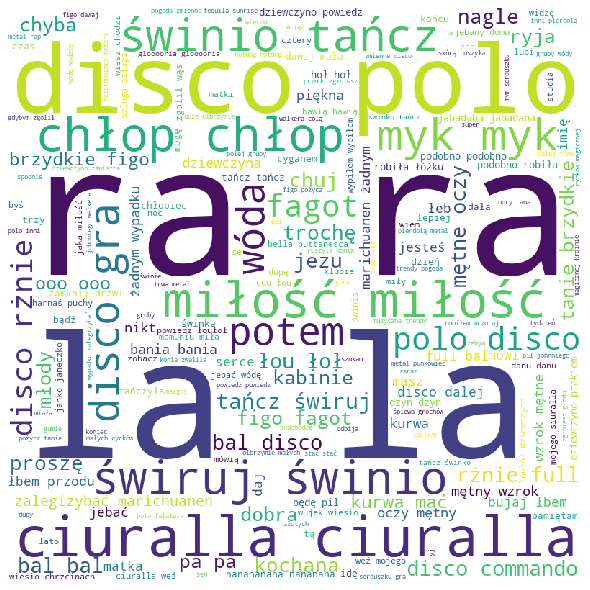

In [45]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 5).generate(" ".join(words))

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [46]:
df

,names,text,words,counter,top_10,bigram,trigram,fourgram,polarity_pl,polarity_en
0,3 króli feat. Popek,raz dwa dwa czterdzieści cztery puszki torba...,"[czterdzieści, cztery, puszki, torba, zmieści,...","{'czterdzieści': 1, 'cztery': 1, 'puszki': 1, ...","[(pamiętam, 7), (chuj, 5), (kwadracie, 5), (kr...","[(raz, dwa), (dwa, dwa), (dwa, czterdzieści), ...","[(raz, dwa, dwa), (dwa, dwa, czterdzieści), (d...","[(raz, dwa, dwa, czterdzieści), (dwa, dwa, czt...",0.166667,-0.103472
1,A w niebie gra disco polo,posłuchaj mnie teraz seba odstaw na chwilę p...,"[posłuchaj, seba, odstaw, chwilę, piwo, popatr...","{'posłuchaj': 1, 'seba': 1, 'odstaw': 1, 'chwi...","[(disco, 10), (polo, 6), (lubi, 5), (pola, 4),...","[(posłuchaj, mnie), (mnie, teraz), (teraz, seb...","[(posłuchaj, mnie, teraz), (mnie, teraz, seba)...","[(posłuchaj, mnie, teraz, seba), (mnie, teraz,...",0.000000,-0.067540
2,Ajem USA,spotkałem ją na lquano disco w dawidach chwilę...,"[spotkałem, lquano, disco, dawidach, chwilę, s...","{'spotkałem': 3, 'lquano': 1, 'disco': 1, 'daw...","[(świnia, 5), (spotkałem, 3), (mówię, 3), (nak...","[(spotkałem, ją), (ją, na), (na, lquano), (lqu...","[(spotkałem, ją, na), (ją, na, lquano), (na, l...","[(spotkałem, ją, na, lquano), (ją, na, lquano,...",0.000000,-0.019474
3,Albatros Dalej Gra,metal długie włosy ma a kiedy disco gra hiphop...,"[metal, długie, włosy, disco, gra, hiphop, kro...","{'metal': 6, 'długie': 1, 'włosy': 1, 'disco':...","[(disco, 25), (polo, 14), (gra, 10), (metal, 6...","[(metal, długie), (długie, włosy), (włosy, ma)...","[(metal, długie, włosy), (długie, włosy, ma), ...","[(metal, długie, włosy, ma), (długie, włosy, m...",0.600000,0.116667
4,Bal jak bal,bal jak bal disco rżnie na full bal jak bal d...,"[bal, bal, disco, rżnie, full, bal, bal, disco...","{'bal': 24, 'disco': 13, 'rżnie': 13, 'full': ...","[(bal, 24), (disco, 13), (rżnie, 13), (full, 1...","[(bal, jak), (jak, bal), (bal, disco), (disco,...","[(bal, jak, bal), (jak, bal, disco), (bal, dis...","[(bal, jak, bal, disco), (jak, bal, disco, rżn...",0.400000,0.253175
...,...,...,...,...,...,...,...,...,...,...
64,Wojownicy Wódy,piątkowa noc to wódy czas to jest wódy czas 10...,"[piątkowa, noc, wódy, czas, wódy, czas, 100, z...","{'piątkowa': 1, 'noc': 1, 'wódy': 5, 'czas': 2...","[(wódy, 5), (boju, 4), (chlup, 3), (wojownicy,...","[(piątkowa, noc), (noc, to), (to, wódy), (wódy...","[(piątkowa, noc, to), (noc, to, wódy), (to, wó...","[(piątkowa, noc, to, wódy), (noc, to, wódy, cz...",0.000000,0.089062
65,Wóda zryje banię,klub noc nocny czar pod pachami adidas podchod...,"[klub, noc, nocny, czar, pachami, adidas, podc...","{'klub': 1, 'noc': 1, 'nocny': 1, 'czar': 1, '...","[(świnia, 5), (wóda, 5), (płacz, 4), (chłopie,...","[(klub, noc), (noc, nocny), (nocny, czar), (cz...","[(klub, noc, nocny), (noc, nocny, czar), (nocn...","[(klub, noc, nocny, czar), (noc, nocny, czar, ...",0.000000,-0.056800
66,Z wędziskiem za pan brat,wędkować pozwól wędkować daj no nie bądź taka ...,"[wędkować, pozwól, wędkować, daj, bądź, laj, l...","{'wędkować': 2, 'pozwól': 1, 'daj': 1, 'bądź':...","[(laj, 5), (wędkować, 2), (pozwól, 1), (daj, 1...","[(wędkować, pozwól), (pozwól, wędkować), (wędk...","[(wędkować, pozwól, wędkować), (pozwól, wędkow...","[(wędkować, pozwól, wędkować, daj), (pozwól, w...",0.000000,0.000000
67,Zalegizybać Marihuaen,dzieńdobry tu bracia figo fagot zapraszamy do ...,"[dzieńdobry, bracia, figo, fagot, zapraszamy, ...","{'dzieńdobry': 1, 'bracia': 1, 'figo': 1, 'fag...","[(zalegizybać, 10), (marichuanen, 10), (żadnym...","[(dzieńdobry, tu), (tu, bracia), (bracia, figo...","[(dzieńdobry, tu, bracia), (tu, bracia, figo),...","[(dzieńdobry, tu, bracia, figo), (tu, bracia, ...",0.000000,0.242982
